In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [63]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [65]:
# Cleaning the data: removing blank lines and null values

# Checking for null values in the dataset
null_values = df.isnull().sum()

In [66]:
null_values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [67]:
# Checking if there are any blank lines (all values are NaN)
blank_lines = df.isna().all(axis=1).sum()

In [68]:
blank_lines

0

In [69]:
# Removing any rows with null values
df_cleaned = df.dropna()

In [70]:
# Displaying the null value count and blank line count, and the first few rows of the cleaned dataframe
null_values, blank_lines, df_cleaned.head()

(age                         0
 anaemia                     0
 creatinine_phosphokinase    0
 diabetes                    0
 ejection_fraction           0
 high_blood_pressure         0
 platelets                   0
 serum_creatinine            0
 serum_sodium                0
 sex                         0
 smoking                     0
 time                        0
 DEATH_EVENT                 0
 dtype: int64,
 0,
     age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
 0  75.0        0                       582         0                 20   
 1  55.0        0                      7861         0                 38   
 2  65.0        0                       146         0                 20   
 3  50.0        1                       111         0                 20   
 4  65.0        1                       160         1                 20   
 
    high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
 0                    1  265000.00           

In [71]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


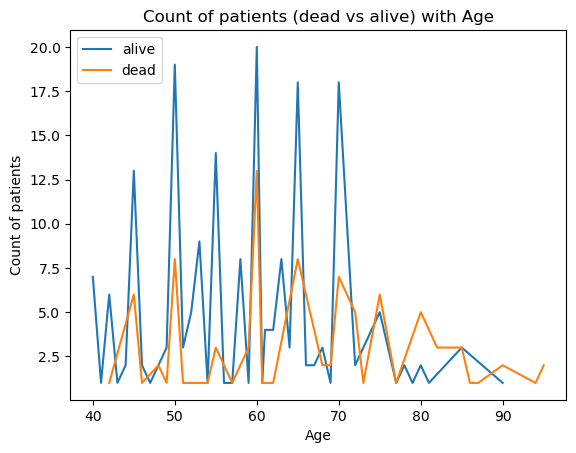

In [77]:
# Count of patients (dead vs alive) with Age
df1=df_cleaned[df_cleaned["DEATH_EVENT"] == 0]
df1_age_counts=df1["age"].value_counts()
df1_sorted=df1_age_counts.sort_index()

df2=df_cleaned[df_cleaned["DEATH_EVENT"] == 1]
df2_age_counts=df2["age"].value_counts()
df2_sorted=df2_age_counts.sort_index()

plt.plot(df1_sorted, label = 'alive')
plt.plot(df2_sorted, label = 'dead')
plt.title('Count of patients (dead vs alive) with Age')
plt.xlabel("Age")
plt.ylabel("Count of patients")
plt.legend(loc="upper left")
plt.savefig("output_GC/Count of patients (dead vs alive) with Age.png")
plt.show()

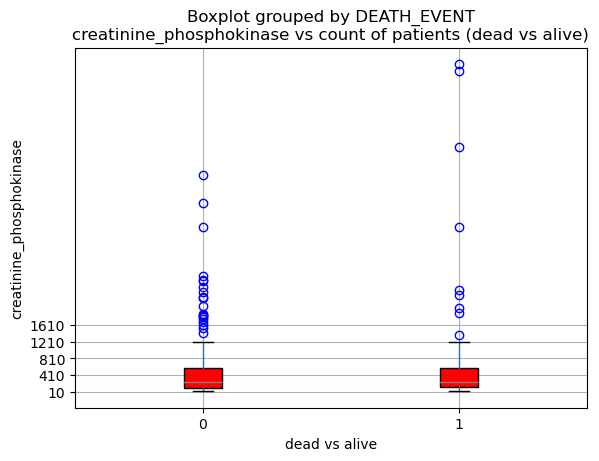

In [155]:
# creatinine_phosphokinase vs count of patients (dead vs alive)
a="blue"
b="grey"
c="red"

# creatinine_phosphokinase vs count of patients (dead vs alive)
cpk = df_cleaned.groupby("DEATH_EVENT")["creatinine_phosphokinase"]
cpk

#plotting the boxplot
df_cleaned.boxplot(column=["creatinine_phosphokinase"], by=["DEATH_EVENT"], patch_artist=True, boxprops=dict(facecolor=c), flierprops=dict(color=a, markeredgecolor=a), medianprops=dict(color=b))
plt.title('creatinine_phosphokinase vs count of patients (dead vs alive)')
plt.xlabel('dead vs alive')
plt.ylabel('creatinine_phosphokinase')

y_ticks = np.arange(10, 2000, 400)
plt.yticks(y_ticks)

plt.savefig("output_GC/creatinine_phosphokinase vs count of patients (dead vs alive).png")
plt.show()

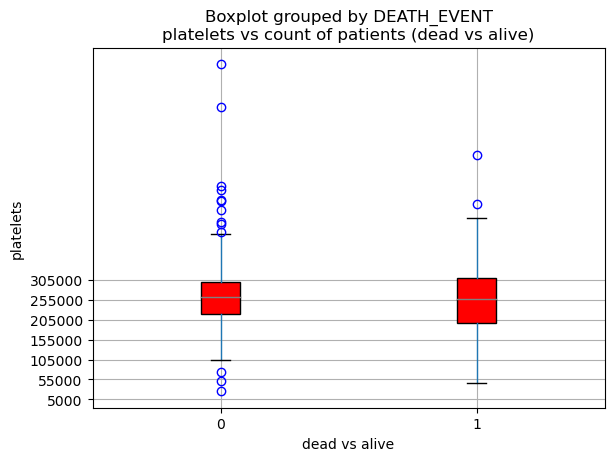

In [154]:
# platelets vs count of patients (dead vs alive)
a="blue"
b="grey"
c="red"

# platelets vs count of patients (dead vs alive)
cpk = df_cleaned.groupby("DEATH_EVENT")["platelets"]
cpk

#plotting the boxplot
df_cleaned.boxplot(column=["platelets"], by=["DEATH_EVENT"], patch_artist=True, boxprops=dict(facecolor=c), flierprops=dict(color=a, markeredgecolor=a), medianprops=dict(color=b))
plt.title('platelets vs count of patients (dead vs alive)')
plt.xlabel('dead vs alive')
plt.ylabel('platelets')

y_ticks = np.arange(5000, 350000, 50000)
plt.yticks(y_ticks)

plt.savefig("output_GC/platelets vs count of patients (dead vs alive).png")
plt.show()

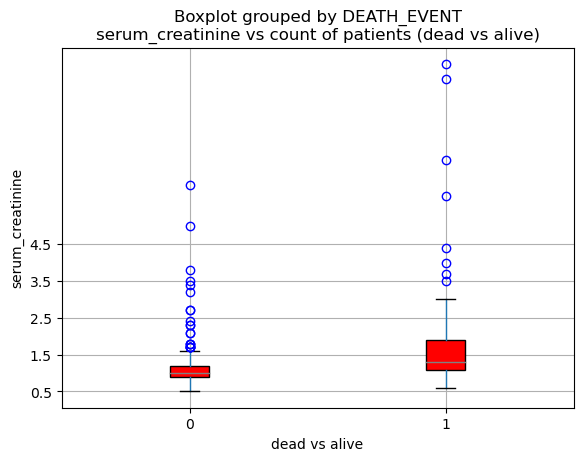

In [153]:
#serum_creatinine vs count of patients (dead vs alive)
a="blue"
b="grey"
c="red"

# serum_creatinine vs count of patients (dead vs alive)
cpk = df_cleaned.groupby("DEATH_EVENT")["serum_creatinine"]
cpk

#plotting the boxplot
df_cleaned.boxplot(column=["serum_creatinine"], by=["DEATH_EVENT"], patch_artist=True, boxprops=dict(facecolor=c), flierprops=dict(color=a, markeredgecolor=a), medianprops=dict(color=b))
plt.title('serum_creatinine vs count of patients (dead vs alive)')
plt.xlabel('dead vs alive')
plt.ylabel('serum_creatinine')

y_ticks = np.arange(0.5, 5, 1)
plt.yticks(y_ticks)

plt.savefig("output_GC/serum_creatinine vs count of patients (dead vs alive).png")
plt.show()

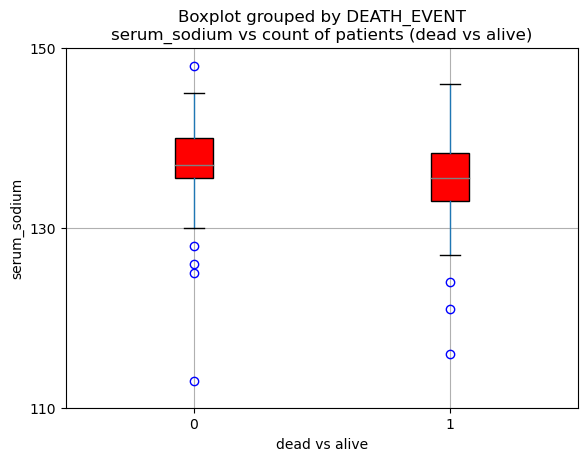

In [152]:
#serum_sodium vs count of patients (dead vs alive)
a="blue"
b="grey"
c="red"

# serum_sodium vs count of patients (dead vs alive)
cpk = df_cleaned.groupby("DEATH_EVENT")["serum_sodium"]
cpk

#plotting the boxplot
df_cleaned.boxplot(column=["serum_sodium"], by=["DEATH_EVENT"], patch_artist=True, boxprops=dict(facecolor=c), flierprops=dict(color=a, markeredgecolor=a), medianprops=dict(color=b))
plt.title('serum_sodium vs count of patients (dead vs alive)')
plt.xlabel('dead vs alive')
plt.ylabel('serum_sodium')

y_ticks = np.arange(110, 160, 20)
plt.yticks(y_ticks)

plt.savefig("output_GC/serum_sodium vs count of patients (dead vs alive).png")
plt.show()

In [119]:
## Separate the Features (X) from the Target (y)
y = df_cleaned["DEATH_EVENT"]
X = df_cleaned.drop(columns="DEATH_EVENT")

In [49]:
## Split our data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(224, 12)

In [50]:
## Create a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier

LogisticRegression(max_iter=200, random_state=1)

In [51]:
## Fit (train) or model using the training data
classifier.fit(X_train, y_train)


LogisticRegression(max_iter=200, random_state=1)

In [52]:
## Score the model using the test data
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8348214285714286
Testing Data Score: 0.7733333333333333


In [54]:
## Make predictions
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(30)

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,1
6,0,0
7,0,0
8,0,0
9,0,0


In [55]:
## Calculate the Accuracy Score
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.7733333333333333